# Sample Code

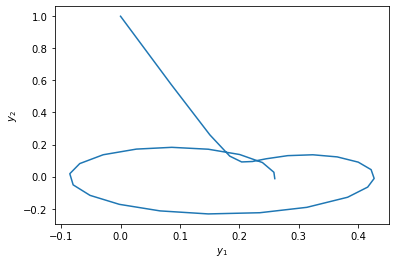

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# define the ode system as given in the problem
def ode(t,y):
    return np.array([y[1], np.sin(t) - 5*y[1] - y[0]])
# define the t0 and tf parameters
t0 = 0
tf = 3*np.pi
# define the initial conditions
y0 = np.array([0,1])
# solve the system
sol = solve_ivp(ode, (t0,tf), y0)
# plot y_1 against y_2
plt.plot(sol.y[0],sol.y[1])
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.show()

# Problem 1: SIR Model Simulation

𝑆′(𝑡)+ 𝐼′(𝑡) + 𝑅′(𝑡) = 0

𝑆(𝑡) + 𝐼(𝑡) +𝑅(𝑡) = 1

3 Million People
5 People Infected

Let:

y0 = Susceptible ||
y1 = Infected ||
y2 = Recovered ||

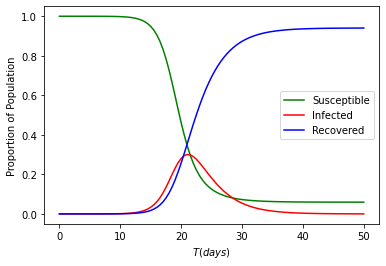

In [38]:
# define the ode system as given in the problem
def ode(t,y):
    return np.array(
     [
         -1 *(1/3000000) * y[0] * y[1],
         ((1/3000000) * y[0] * y[1]) - ((1/3) * y[1]),
         (1/3) * y[1]
     ]
 )

# define the t0 and tf parameters
t0 = 0
tf = 50

# define the initial conditions
y0 = np.array([3000000, 5, 0])

# solve the system
sol = solve_ivp(ode, (t0,tf), y0, t_eval = np.arange(0,50.5,0.5))
# plot y_1 against y_2

fig, axes = plt.subplots()
axes.plot(sol.t,sol.y[0]/ 3000000, 'g', label = 'Susceptible')
axes.plot(sol.t,sol.y[1]/ 3000000, 'r', label = 'Infected')
axes.plot(sol.t,sol.y[2]/ 3000000, 'b', label = 'Recovered')
axes.set_xlabel('$T (days) $')
axes.set_ylabel('Proportion of Population')
axes.legend()
plt.show()

In [39]:
peak_work_idx = np.where(sol.y[1] == np.amax(sol.y[1]))
peak_work_idx = int(peak_work_idx[0][0])
print('Peak Infection occurred at:', str(peak_work_idx/2),'days.', 'The number of people who can work at peak infection is:', str(round(sol.y[2][peak_work_idx] + sol.y[0][peak_work_idx])))

Peak Infection occurred at: 21.0 days. The number of people who can work at peak infection is: 2098173


# Problem 2

N = 8.399 million people total

52 people infected

150 days

Average sase of covid lasts for 10 days

each person can spread the virus to 2:5 people

b = 0.1


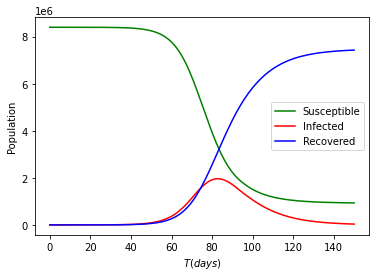

In [40]:
# define the ode system as given in the problem
def ode(t,y):
    return np.array(
     [
         -1 * (2.5*0.1/8399000) * y[0] * y[1],
         (2.5*0.1/8399000) * y[0] * y[1] - (1/10) * y[1],
         (1/10) * y[1]
     ]
 )

# define the t0 and tf parameters
t0 = 0
tf = 150

# define the initial conditions
y0 = np.array([8399000, 52, 0])

# solve the system
sol = solve_ivp(ode, (t0,tf), y0, t_eval = np.arange(0, 151))
# plot y_1 against y_2

fig, axes = plt.subplots()
axes.plot(sol.t,sol.y[0], 'g', label = 'Susceptible')
axes.plot(sol.t,sol.y[1], 'r', label = 'Infected')
axes.plot(sol.t,sol.y[2], 'b', label = 'Recovered')
axes.set_xlabel('$T (days) $')
axes.set_ylabel('Population')
axes.legend()
plt.show()

In [41]:
for idx, val in enumerate(sol.y[1]):
    if val == np.amax(sol.y[1]):
        print('Peak infected is: ' + str(round(sol.y[1][idx])) + ' at day = ' + str(idx) )

Peak infected is: 1961920 at day = 83


In [42]:
#i = np.where(sol.y[1] == np.amax(sol.y[1]))

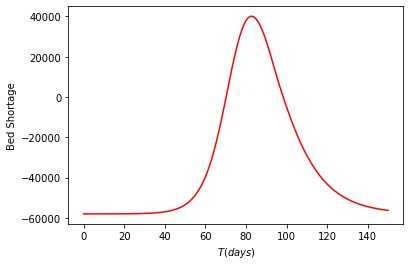

In [43]:
fig, axes = plt.subplots()
axes.plot(sol.t, (sol.y[1] * 0.05) - 58000, 'r')
axes.set_xlabel('$T (days) $')
axes.set_ylabel('Bed Shortage')
plt.show()

In [44]:
bed_capacity = (sol.y[1] * 0.05) - 58000
peak_bed_capacity_idx = np.where(bed_capacity == np.amax(bed_capacity))
peak_bed_capacity_value = bed_capacity[peak_bed_capacity_idx]
print('At days =', peak_bed_capacity_idx[0][0], 'The peak bed shortage is:', round(peak_bed_capacity_value[0]))

At days = 83 The peak bed shortage is: 40096


# Problem 3

7000000000 - Population
1000 initial infected
a = 1/10
f = 1/50
u = 0.0001
b = 1
k = 1/2 

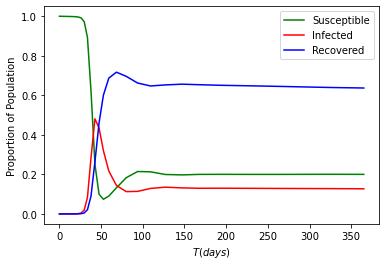

In [47]:
# define the ode system as given in the problem
def ode(t,y):
    N = 7000000000
    a = 1/10
    f = 1/50
    u = 0.0001
    b = 1
    k = 1/2
    return np.array(
     [
         f*y[2] + u * (1-y[0]) - ((k*b)/N) * y[0] * y[1],
         ((k*b)/N) * y[0] * y[1] - (a + u) * y[1],
         -f*y[2] + a*y[1] - u*y[2]
     ]
 )

# define the t0 and tf parameters
t0 = 0
tf = 365

# define the initial conditions
y0 = np.array([7000000000, 1000, 0])

# solve the system
sol = solve_ivp(ode, (t0,tf), y0)
# plot y_1 against y_2

fig, axes = plt.subplots()
axes.plot(sol.t,sol.y[0]/ 7000000000, 'g', label = 'Susceptible')
axes.plot(sol.t,sol.y[1]/ 7000000000, 'r', label = 'Infected')
axes.plot(sol.t,sol.y[2]/ 7000000000, 'b', label = 'Recovered')
axes.set_xlabel('$T (days) $')
axes.set_ylabel('Proportion of Population')
axes.legend()
plt.show()